In [1]:
# Kütüphaneleri import edelim
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Python'da uyarıları kapatalım
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Verileri içeri aktaralım
df15 = pd.read_csv('2015.csv')
df16 = pd.read_csv('2016.csv')
df17 = pd.read_csv('2017.csv')
df18 = pd.read_csv('2018.csv')
df19 = pd.read_csv('2019.csv')

In [3]:
# Veri setlerimize sırasıyla bakalım.
df15.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [4]:
df16.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


In [5]:
df17.head(3)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


In [6]:
df18.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


In [7]:
df19.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [8]:
# Veri setlerindeki kolonların isimlerinin farklı olduğunu gördük şimdi bu kolon isimlerine daha sade bir şekilde bakalım.
print(df15.columns,"\n",df16.columns,"\n",df17.columns,"\n",df18.columns,"\n",df19.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object') 
 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object') 
 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object') 
 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
     

In [9]:
# Veri setleri için ortak kolan isimleri oluşturalım ve gereksiz kolonları silelim.
df15.drop(["Region"], axis=1, inplace=True)
df15['Year'] = 2015
df15.rename(columns={
    'Happiness Rank' : 'Rank',
    'Happiness Score' : 'Score',
    'Standard Error' : 'Error',
    'Economy (GDP per Capita)' : 'Economy',
    'Health (Life Expectancy)' : 'Life_Expectancy',
    'Trust (Government Corruption)' :'Trust',
    'Dystopia Residual' : 'Dystopia_Residual'
},inplace = True)



df16["Error"] = df16["Upper Confidence Interval"] - df16["Lower Confidence Interval"]
df16.drop(["Region","Upper Confidence Interval","Lower Confidence Interval"], axis=1, inplace=True)
df16['Year'] = 2016
df16.rename(columns={
    'Happiness Rank' : 'Rank',
    'Happiness Score' : 'Score',
    'Economy (GDP per Capita)' : 'Economy',
    'Health (Life Expectancy)' : 'Life_Expectancy',
    'Trust (Government Corruption)' : 'Trust',
    'Dystopia Residual' : 'Dystopia_Residual'
},inplace = True)


df17["Error"] = df17["Whisker.high"] - df17["Whisker.low"]
df17.drop(["Whisker.high","Whisker.low"], axis=1, inplace=True)
df17['Year'] = 2017
df17.rename(columns={
    'Happiness.Rank' : 'Rank',
    'Happiness.Score' : 'Score',
    'Economy..GDP.per.Capita.' : 'Economy',
    'Health..Life.Expectancy.': 'Life_Expectancy',
    'Trust..Government.Corruption.' : 'Trust',
    'Dystopia.Residual' : 'Dystopia_Residual'
},inplace = True)

df18['Year'] = 2018
df18.rename(columns={
    'Overall rank' : 'Rank',
    'Country or region' : 'Country',
    'GDP per capita' : 'Economy',
    'Social support' : 'Family',
    'Healthy life expectancy'  : 'Life_Expectancy',
    'Freedom to make life choices' :  'Freedom',
    'Perceptions of corruption' : 'Trust'
},inplace = True)

df19['Year'] = 2019
df19.rename(columns={
    'Overall rank' :'Rank',
    'Country or region' :'Country',
    'GDP per capita' : 'Economy',
    'Social support' : 'Family',
    'Healthy life expectancy' : 'Life_Expectancy',
    'Freedom to make life choices' :   'Freedom',
    'Perceptions of corruption' : 'Trust'
},inplace=True)

In [10]:
# Şimdi yeni kolon isimnleri ile veri setlerine sırayla tekrar bakalım.
df15.head(3)

,Country,Rank,Score,Error,Economy,Family,Life_Expectancy,Freedom,Trust,Generosity,Dystopia_Residual,Year
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015


In [11]:
df16.head(3)

,Country,Rank,Score,Economy,Family,Life_Expectancy,Freedom,Trust,Generosity,Dystopia_Residual,Error,Year
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,0.132,2016
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,0.162,2016
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,0.336,2016


In [12]:
df17.head(3)

,Country,Rank,Score,Economy,Family,Life_Expectancy,Freedom,Generosity,Trust,Dystopia_Residual,Error,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0.114889,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,0.119456,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0.236061,2017


In [13]:
df18.head(3)

,Rank,Country,Score,Economy,Family,Life_Expectancy,Freedom,Generosity,Trust,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018


In [14]:
df19.head(3)

,Rank,Country,Score,Economy,Family,Life_Expectancy,Freedom,Generosity,Trust,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019


In [15]:
# Veri setlerini bileştirelim.
cols = ["Country","Rank","Economy","Family","Life_Expectancy","Freedom","Generosity","Trust","Year","Score"]
data_new = pd.concat([df15[cols],df16[cols],df17[cols],df18[cols],df19[cols]], axis=0).reset_index(drop=True)
data_new.sample(5)

,Country,Rank,Economy,Family,Life_Expectancy,Freedom,Generosity,Trust,Year,Score
607,Ukraine,138,0.793000,1.413000,0.609000,0.163000,0.187000,0.011000,2018,4.103
213,Russia,56,1.232280,1.052610,0.589910,0.326820,0.027360,0.035860,2016,5.856
416,Tunisia,102,1.007266,0.868351,0.613212,0.289681,0.049693,0.086723,2017,4.805
174,Brazil,17,1.087540,1.039380,0.614150,0.404250,0.157760,0.141660,2016,6.952
644,United States,19,1.433000,1.457000,0.874000,0.454000,0.280000,0.128000,2019,6.892


In [16]:
# Sıfır olan değerlerin toplamına bakalım.
data_new.eq(0).sum()

Country            0
Rank               0
Economy            5
Family             5
Life_Expectancy    5
Freedom            5
Generosity         5
Trust              6
Year               0
Score              0
dtype: int64

In [17]:
# Veri setimizde null değerler var mı kontrol edelim.
data_new.isnull().values.any()

True

In [18]:
# Null değerlerinin toplamına bakalım.
data_new.isnull().sum()

Country            0
Rank               0
Economy            0
Family             0
Life_Expectancy    0
Freedom            0
Generosity         0
Trust              1
Year               0
Score              0
dtype: int64

In [19]:
# Null değerlerin 'Trust' sütununda olduğunu görüyoruz ve 'Trust' için Null değerleri listeleyelim.
data_new[data_new["Trust"].isnull()]

,Country,Rank,Economy,Family,Life_Expectancy,Freedom,Generosity,Trust,Year,Score
489,United Arab Emirates,20,2.096,0.776,0.67,0.284,0.186,NaN,2018,6.774


In [20]:
# Null değerin Contry'si United Arab Emirates olan değerlerden biri olduğunu görüyoruz.Bu yüzden df adında bir değişkene Conutry'si United Arab Emirates olan değerleri atayalım. 
df = data_new[data_new['Country'] == 'United Arab Emirates']
df.head()

,Country,Rank,Economy,Family,Life_Expectancy,Freedom,Generosity,Trust,Year,Score
19,United Arab Emirates,20,1.427270,1.12575,0.809250,0.641570,0.264280,0.38583,2015,6.901
185,United Arab Emirates,28,1.573520,0.87114,0.729930,0.562150,0.265910,0.35561,2016,6.573
335,United Arab Emirates,21,1.626343,1.26641,0.726798,0.608345,0.360942,0.32449,2017,6.648
489,United Arab Emirates,20,2.096000,0.77600,0.670000,0.284000,0.186000,NaN,2018,6.774
646,United Arab Emirates,21,1.503000,1.31000,0.825000,0.598000,0.262000,0.18200,2019,6.825


In [21]:
# df değişkeni için 'Trust' sütununun ortalamasını alalım.
df['Trust'].mean()


0.3119823909258842

In [22]:
# data içinde 'Trust' sütunundaki boş olan değer için yukarıda bulduğumuz ortalama değer ile dolduralım.
data_new.fillna(df['Trust'].mean(),inplace=True)

In [23]:
# Tekrardan kontrol ededilm 'Trust' sütununda hala boş değer vaer mı?
data_new[data_new["Trust"].isnull()]

,Country,Rank,Economy,Family,Life_Expectancy,Freedom,Generosity,Trust,Year,Score


In [24]:
# describe ile veri setindeki istatistiksel değerlere bakalım.
data_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,782.0,78.698210,45.182384,1.000,40.000000,79.000000,118.000000,158.000000
Economy,782.0,0.916047,0.407340,0.000,0.606500,0.982205,1.236187,2.096000
Family,782.0,1.078392,0.329548,0.000,0.869363,1.124735,1.327250,1.644000
Life_Expectancy,782.0,0.612416,0.248309,0.000,0.440183,0.647310,0.808000,1.141000
Freedom,782.0,0.411091,0.152880,0.000,0.309768,0.431000,0.531000,0.724000
Generosity,782.0,0.218576,0.122321,0.000,0.130000,0.201982,0.278832,0.838075
Trust,782.0,0.125674,0.105959,0.000,0.054250,0.091033,0.156243,0.551910
Year,782.0,2016.993606,1.417364,2015.000,2016.000000,2017.000000,2018.000000,2019.000000
Score,782.0,5.379018,1.127456,2.693,4.509750,5.322000,6.189500,7.769000


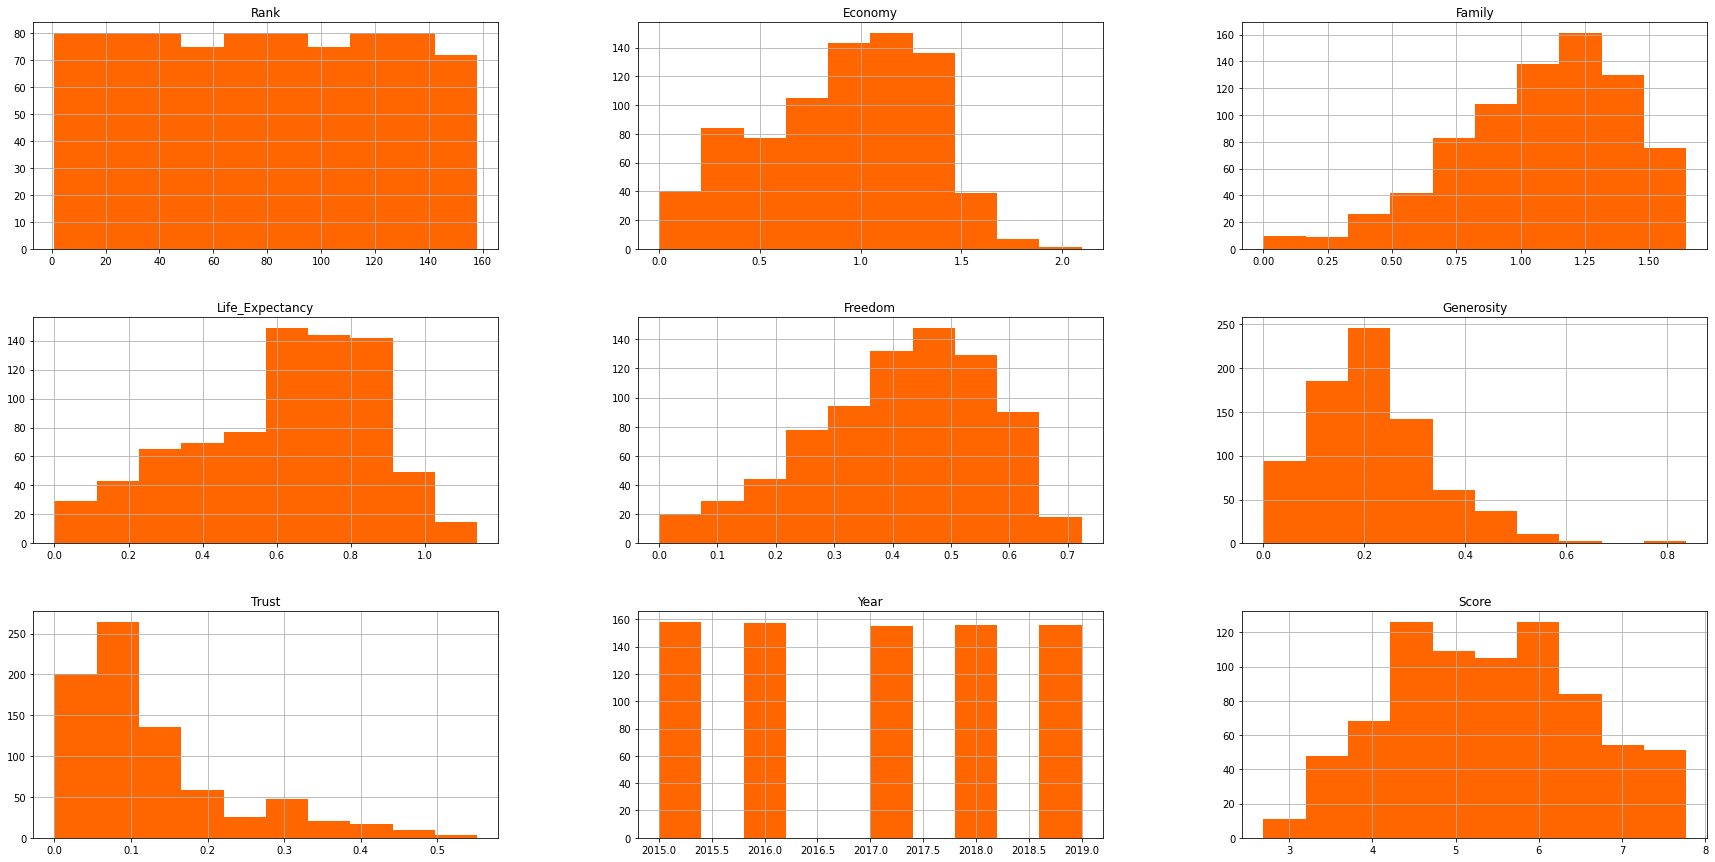

In [25]:
# Histogram
data_new.hist(figsize = (30,15), color='#ff6600')
plt.show()

In [26]:
# Veri setinin korelasyonuna bakalım
data_new.corr()

,Rank,Economy,Family,Life_Expectancy,Freedom,Generosity,Trust,Year,Score
Rank,1.000000,-0.794791,-0.644842,-0.743655,-0.537942,-0.117713,-0.374567,-0.007768,-0.992066
Economy,-0.794791,1.000000,0.585966,0.784338,0.340511,-0.014560,0.310581,0.019768,0.789284
Family,-0.644842,0.585966,1.000000,0.572650,0.420361,-0.037262,0.124014,0.367431,0.648799
Life_Expectancy,-0.743655,0.784338,0.572650,1.000000,0.340745,0.010638,0.250529,0.130302,0.742456
Freedom,-0.537942,0.340511,0.420361,0.340745,1.000000,0.290706,0.456604,0.010353,0.551258
Generosity,-0.117713,-0.014560,-0.037262,0.010638,0.290706,1.000000,0.317672,-0.192587,0.137578
Trust,-0.374567,0.310581,0.124014,0.250529,0.456604,0.317672,1.000000,-0.120382,0.400026
Year,-0.007768,0.019768,0.367431,0.130302,0.010353,-0.192587,-0.120382,1.000000,0.007065
Score,-0.992066,0.789284,0.648799,0.742456,0.551258,0.137578,0.400026,0.007065,1.000000


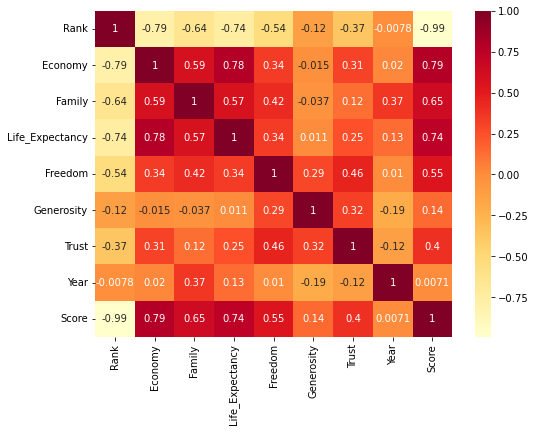

In [27]:
#Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data_new.corr(),annot=True,cmap='YlOrRd')
plt.show()

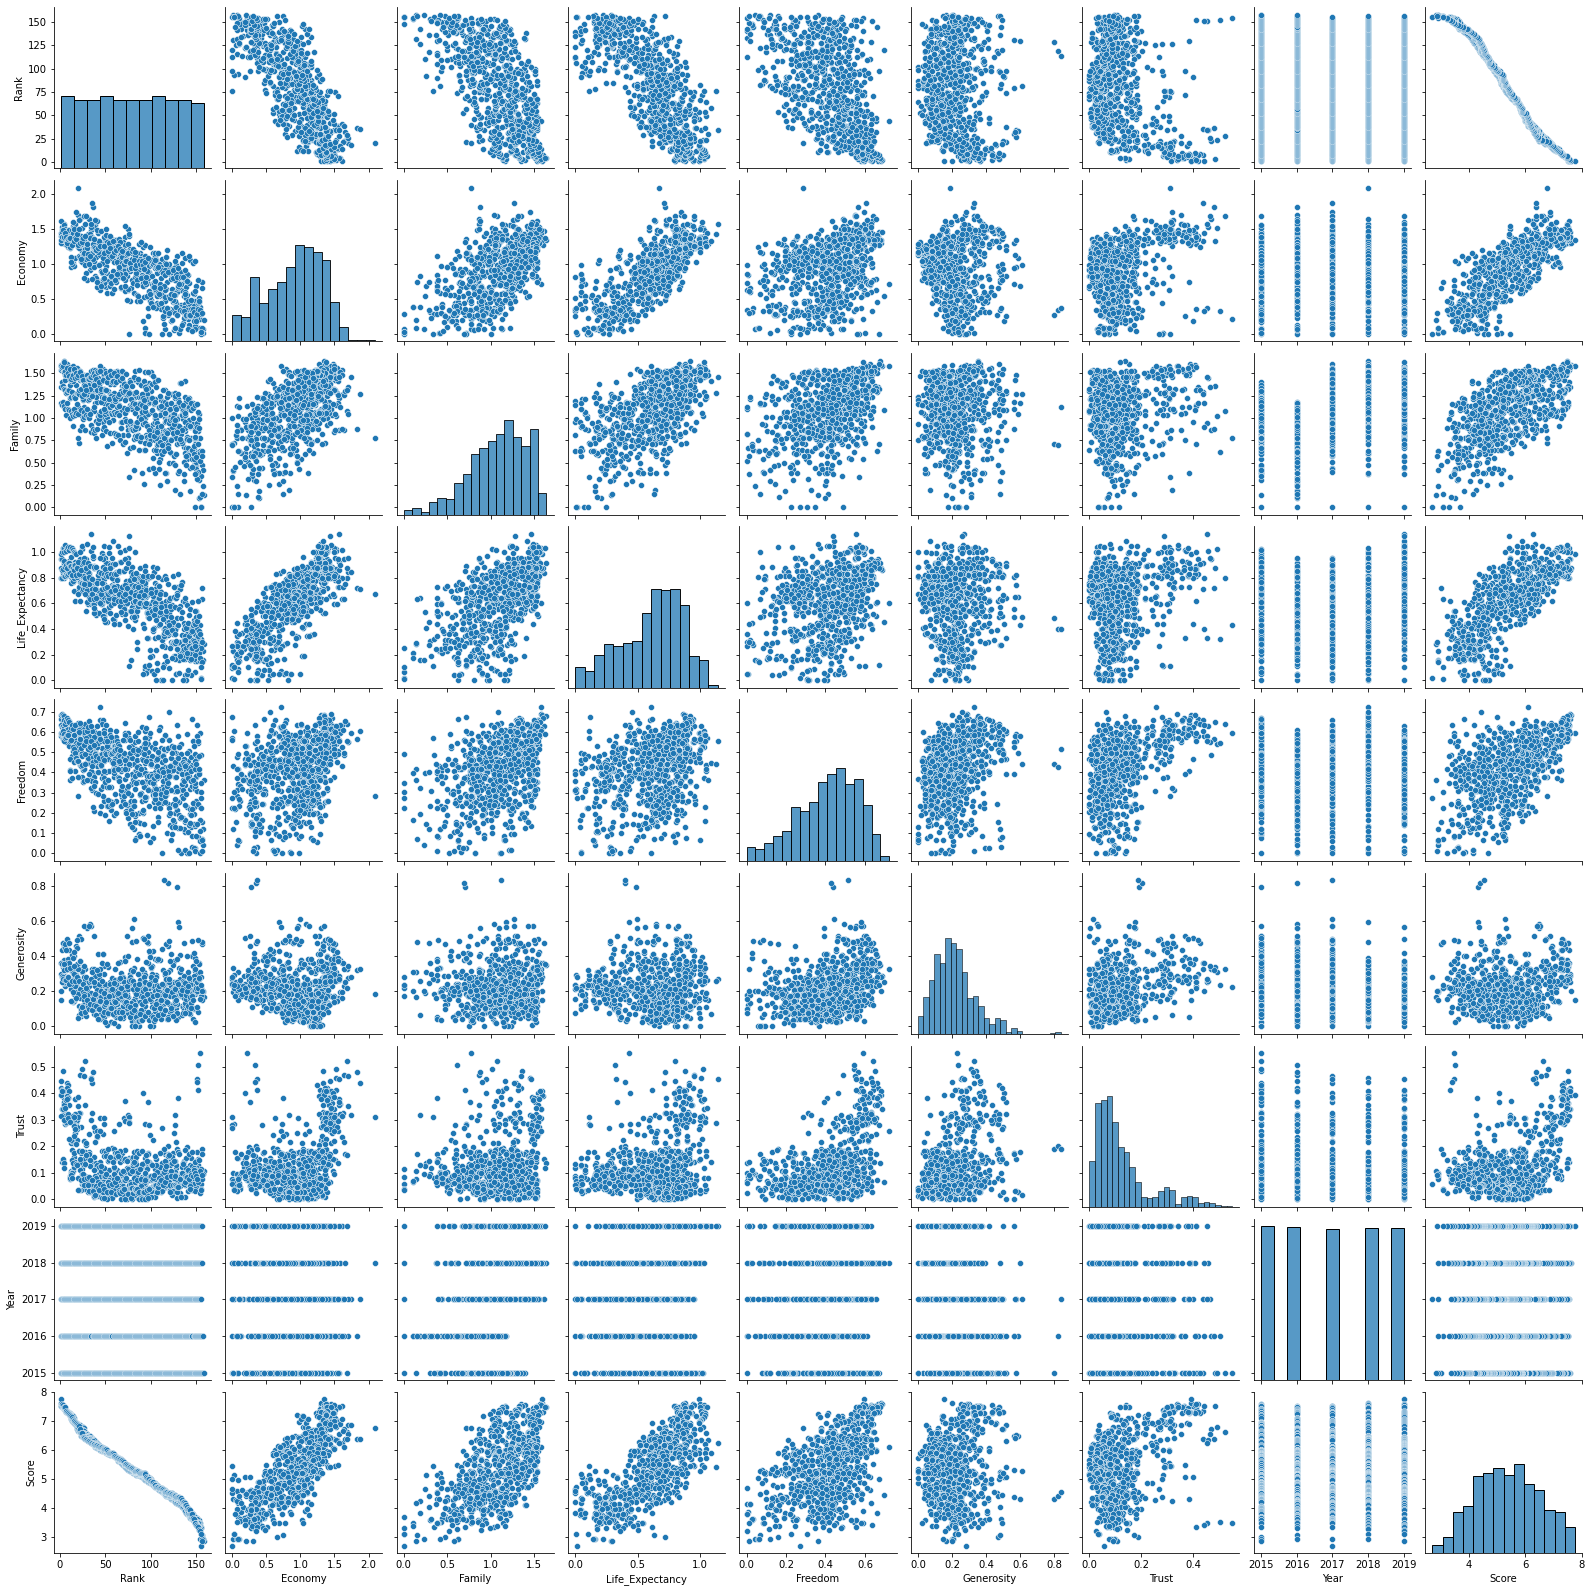

In [28]:
sns.pairplot(data_new)

In [29]:
# Country değişkeni için unique olan değerleri listeleyelim.
country=data_new['Country'].unique()
country

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [30]:
ort=data_new.groupby("Country").mean()

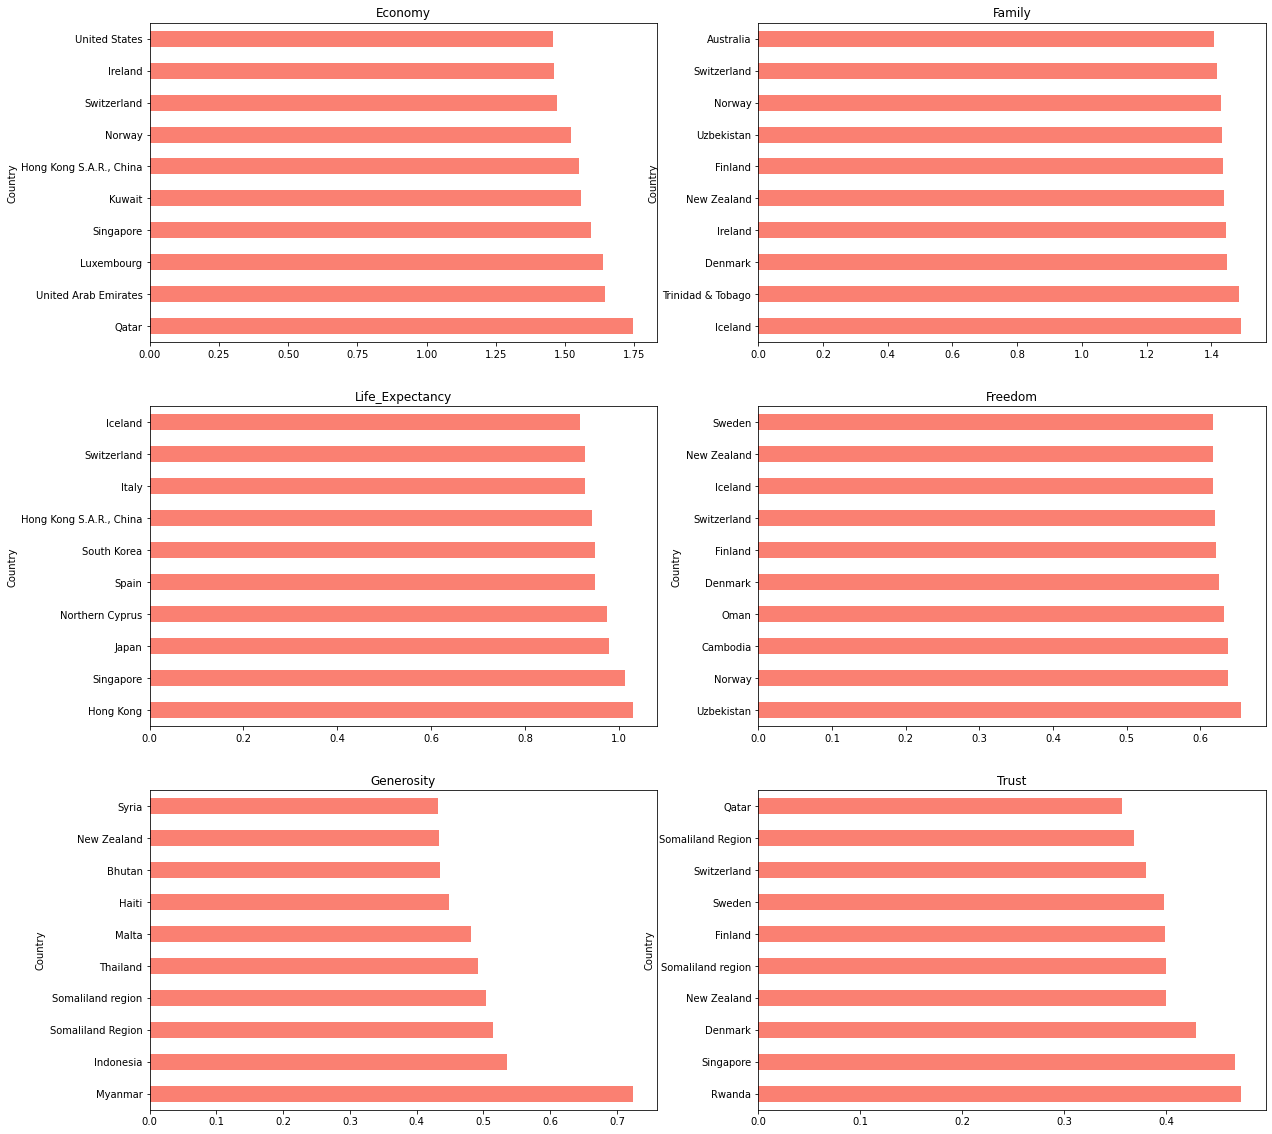

In [31]:
plt.figure(figsize=(20,20))
rows = 3
columns = 2
for i,column in enumerate(ort.columns.values[1:-2]):
    plt.subplot(rows,columns,i+1)
    sorted_grouped_country = ort.sort_values(column,ascending=False)[:10]
    sorted_grouped_country[column].plot(kind="barh",color= 'salmon')
    plt.title(column) 

In [32]:
ort2=data_new.groupby("Year").mean()

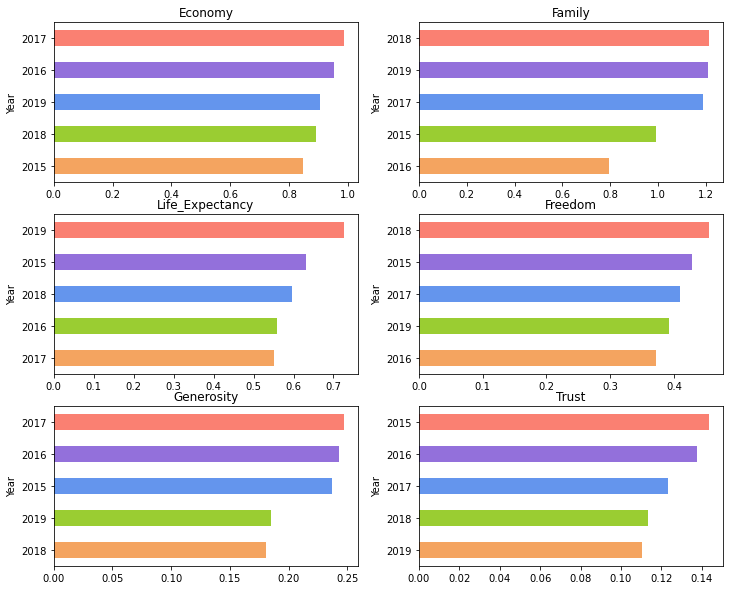

In [33]:
plt.figure(figsize=(12,10))
rows = 3
columns = 2
for i,column in enumerate(ort2.columns.values[1:-1]):
    plt.subplot(rows,columns,i+1)
    sorted_grouped = ort2.sort_values(column)
    sorted_grouped[column].plot(kind="barh",color= ['sandybrown','yellowgreen','cornflowerblue','mediumpurple','salmon'])
    plt.title(column) 